# Problem 1: Linear Regression
# We will create Linear Regression StatsModel

# Importing the  Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
sns.set()

# Importing the csv file.

In [2]:
df = pd.read_csv('Cars.csv')
df

Name    Location    Year  Kilometers_Driven  \
0            Mahindra Scorpio        Pune  2012.0            99000.0   
1               Maruti Baleno       Kochi  2018.0            18678.0   
2               Mahindra Xylo   Bangalore  2013.0           197000.0   
3               Hyundai Grand       Delhi  2014.0            45000.0   
4               Toyota Innova       Delhi  2011.0            65000.0   
...                       ...         ...     ...                ...   
5956              Honda Civic        Pune  2011.0            47000.0   
5957              Hyundai i20       Delhi  2013.0            63777.0   
5958             Maruti Swift  Coimbatore  2016.0            37806.0   
5959  Mercedes-Benz SLK-Class  Coimbatore  2016.0            22732.0   
5960              Hyundai i10     Kolkata  2016.0             7000.0   

     Fuel_Type Transmission Owner_Type  Mileage  Engine  Power        Colour  \
0       Diesel       Manual      Third    12.05  2179.0  120.0  Black/Silver   
1       Petrol       Manual      First    21.10   998.0  100.0        Others   
2       Diesel       Manual      First    11.68  2498.0  112.0         White   
3       Diesel       Manual      First    24.00  1120.0   70.0         White   
4       Diesel       Manual      First    12.80  2494.0  102.0        Others   
...        ...          ...        ...      ...     ...    ...           ...   
5956    Petrol    Automatic     Second    13.90  1799.0  130.3        Others   
5957    Petrol       Manual      First    18.50  1197.0   82.9  Black/Silver   
5958    Petrol       Manual      First    20.40  1197.0   81.8  Black/Silver   
5959    Petrol    Automatic      First    18.10  3498.0  306.0  Black/Silver   
5960    Petrol       Manual      First    20.36  1197.0   78.9         White   

      Seats  No. of Doors  New_Price  Price  
0       8.0           5.0        NaN   6.00  
1       5.0           4.0        NaN   8.32  
2       7.0           5.0        NaN   4.00  
3       5.0           4.0        NaN   3.49  
4       8.0           5.0        NaN   6.40  
...     ...           ...        ...    ...  
5956    5.0           4.0        NaN   4.50  
5957    5.0           4.0        NaN   3.67  
5958    5.0           4.0        NaN   5.20  
5959    2.0           2.0        NaN  55.54  
5960    5.0           4.0        NaN   3.60  

[5961 rows x 15 columns]

# Basic EDA

In [3]:
df.shape

(5961, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5961 non-null   object 
 1   Location           5950 non-null   object 
 2   Year               5959 non-null   float64
 3   Kilometers_Driven  5953 non-null   float64
 4   Fuel_Type          5961 non-null   object 
 5   Transmission       5934 non-null   object 
 6   Owner_Type         5946 non-null   object 
 7   Mileage            5959 non-null   float64
 8   Engine             5944 non-null   float64
 9   Power              5826 non-null   float64
 10  Colour             5950 non-null   object 
 11  Seats              5956 non-null   float64
 12  No. of Doors       5960 non-null   float64
 13  New_Price          824 non-null    float64
 14  Price              5961 non-null   float64
dtypes: float64(9), object(6)
memory usage: 698.7+ KB


In [5]:
df.describe(include='all').T

count unique           top  freq          mean  \
Name                 5961    212  Maruti Swift   343           NaN   
Location             5950     11        Mumbai   781           NaN   
Year               5959.0    NaN           NaN   NaN   2013.389159   
Kilometers_Driven  5953.0    NaN           NaN   NaN  58711.100118   
Fuel_Type            5961      5        Diesel  3188           NaN   
Transmission         5934      2        Manual  4225           NaN   
Owner_Type           5946      4         First  4875           NaN   
Mileage            5959.0    NaN           NaN   NaN     18.184499   
Engine             5944.0    NaN           NaN   NaN   1622.552995   
Power              5826.0    NaN           NaN   NaN    113.434113   
Colour               5950      3         White  2115           NaN   
Seats              5956.0    NaN           NaN   NaN       5.26914   
No. of Doors       5960.0    NaN           NaN   NaN      4.114933   
New_Price           824.0    NaN           NaN   NaN     20.320716   
Price              5961.0    NaN           NaN   NaN      9.528103   

                            std     min      25%      50%      75%        max  
Name                        NaN     NaN      NaN      NaN      NaN        NaN  
Location                    NaN     NaN      NaN      NaN      NaN        NaN  
Year                   3.243051  1998.0   2011.5   2014.0   2016.0     2019.0  
Kilometers_Driven  91712.207172   171.0  33931.0  53000.0  73000.0  6500000.0  
Fuel_Type                   NaN     NaN      NaN      NaN      NaN        NaN  
Transmission                NaN     NaN      NaN      NaN      NaN        NaN  
Owner_Type                  NaN     NaN      NaN      NaN      NaN        NaN  
Mileage                4.524639     0.0    15.26    18.16     21.1      33.54  
Engine               601.689666    72.0   1198.0   1493.0   1984.0     5998.0  
Power                 53.935723    34.2     75.0   98.145    138.1      560.0  
Colour                      NaN     NaN      NaN      NaN      NaN        NaN  
Seats                  0.789048     2.0      5.0      5.0      5.0       10.0  
No. of Doors           0.344757     2.0      4.0      4.0      4.0        5.0  
New_Price             20.198119     1.0    7.845   11.415    24.01      99.92  
Price                 11.214382    0.44      3.5     5.66     10.0      160.0

# Finding the  unique values for categorical variables

In [6]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

NAME :  212
Mahindra E               1
Volkswagen Beetle        1
Bentley Continental      1
Mitsubishi Montero       1
Volkswagen Tiguan        1
                      ... 
Toyota Innova          164
Hyundai Verna          170
Hyundai i20            247
Honda City             265
Maruti Swift           343
Name: Name, Length: 212, dtype: int64


LOCATION :  11
Ahmedabad     222
Bangalore     351
Jaipur        406
Chennai       489
Kolkata       526
Delhi         549
Pune          611
Coimbatore    630
Kochi         646
Hyderabad     739
Mumbai        781
Name: Location, dtype: int64


FUEL_TYPE :  5
Electric       2
LPG           10
CNG           56
Petrol      2705
Diesel      3188
Name: Fuel_Type, dtype: int64


TRANSMISSION :  2
Automatic    1709
Manual       4225
Name: Transmission, dtype: int64


OWNER_TYPE :  4
Fourth & Above       8
Third              110
Second             953
First             4875
Name: Owner_Type, dtype: int64


COLOUR :  3
Black/Silver    1848
Others      

# Missing values

In [7]:
df.isnull().sum()

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                 135
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

# Imputing missing values

In [8]:
for column in df.columns:
    if df[column].dtype == 'float64':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()

Name                  0
Location             11
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission         27
Owner_Type           15
Mileage               0
Engine                0
Power                 0
Colour               11
Seats                 0
No. of Doors          0
New_Price             0
Price                 0
dtype: int64

# Checking for duplicates

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


In [11]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (5961, 15)
After (5960, 15)


In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [13]:
df.describe().T

count          mean           std      min        25%  \
Year               5960.0   2013.390436      3.241741  1998.00   2012.000   
Kilometers_Driven  5960.0  58704.527517  91658.524227   171.00  34000.000   
Mileage            5960.0     18.184237      4.524217     0.00     15.260   
Engine             5960.0   1622.322148    600.825746    72.00   1198.000   
Power              5960.0    113.099063     53.367342    34.20     78.000   
Seats              5960.0      5.268960      0.788814     2.00      5.000   
No. of Doors       5960.0      4.114933      0.344757     2.00      4.000   
New_Price          5960.0     12.646260      8.111407     1.00     11.415   
Price              5960.0      9.529408     11.214871     0.44      3.500   

                         50%        75%         max  
Year                2014.000   2016.000     2019.00  
Kilometers_Driven  53000.000  73000.000  6500000.00  
Mileage               18.160     21.100       33.54  
Engine              1493.000   1984.000     5998.00  
Power                 98.145    138.100      560.00  
Seats                  5.000      5.000       10.00  
No. of Doors           4.000      4.000        5.00  
New_Price             11.415     11.415       99.92  
Price                  5.665     10.000      160.00

# Plot Scatter plot with all values against price

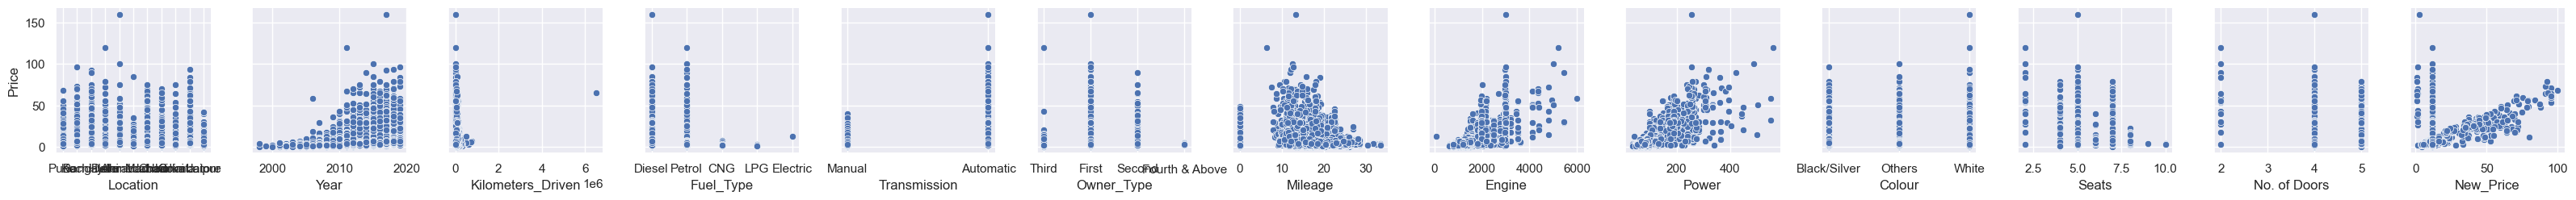

In [17]:
sns.pairplot(df, x_vars=['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Colour', 'Seats', 'No. of Doors', 'New_Price'], y_vars='Price', kind='scatter')
plt.show()

In [18]:
df.corr()

C:\Users\Rohan Pagar\AppData\Local\Temp\ipykernel_18036\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Year  Kilometers_Driven   Mileage    Engine     Power  \
Year               1.000000          -0.172917  0.314539 -0.054079  0.019926   
Kilometers_Driven -0.172917           1.000000 -0.064895  0.090291  0.031969   
Mileage            0.314539          -0.064895  1.000000 -0.599168 -0.510758   
Engine            -0.054079           0.090291 -0.599168  1.000000  0.861073   
Power              0.019926           0.031969 -0.510758  0.861073  1.000000   
Seats              0.014381           0.086764 -0.313580  0.410712  0.115621   
No. of Doors       0.018101           0.068298 -0.262919  0.364272  0.134079   
New_Price          0.113238          -0.029707 -0.068502  0.193833  0.274169   
Price              0.305327          -0.011413 -0.314812  0.658433  0.769761   

                      Seats  No. of Doors  New_Price     Price  
Year               0.014381      0.018101   0.113238  0.305327  
Kilometers_Driven  0.086764      0.068298  -0.029707 -0.011413  
Mileage           -0.313580     -0.262919  -0.068502 -0.314812  
Engine             0.410712      0.364272   0.193833  0.658433  
Power              0.115621      0.134079   0.274169  0.769761  
Seats              1.000000      0.905104   0.001807  0.060146  
No. of Doors       0.905104      1.000000  -0.008879  0.066659  
New_Price          0.001807     -0.008879   1.000000  0.368429  
Price              0.060146      0.066659   0.368429  1.000000

C:\Users\Rohan Pagar\AppData\Local\Temp\ipykernel_18036\1344996239.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)


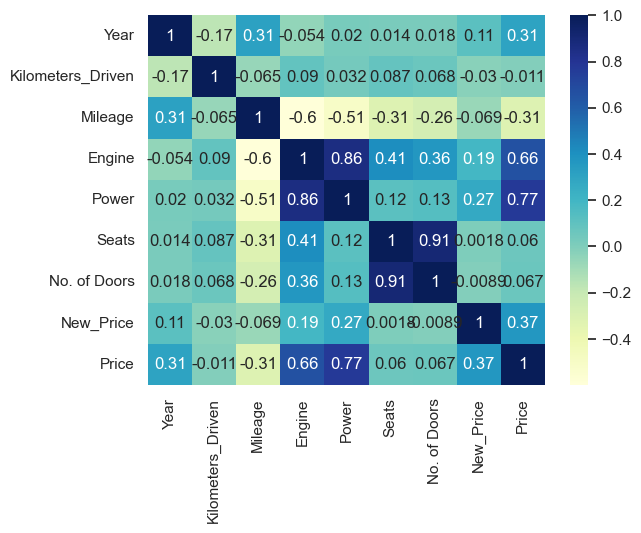

In [19]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# # As checked in heatmap power is parameter most corelate with price.

# Create learning pattern

In [20]:
X= df[['Power']]
Y= df[['Price']]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
X_train

Power
5735  103.60
4638  108.45
2670  245.00
2998   91.70
4273   68.05
...      ...
350   103.52
79    118.00
3927   89.84
5956  130.30
5640   81.80

[4172 rows x 1 columns]

In [23]:
Y_train

Price
5735   5.90
4638   4.99
2670  27.00
2998   4.65
4273   2.85
...     ...
350    6.54
79     2.85
3927   7.48
5956   4.50
5640   3.65

[4172 rows x 1 columns]

In [24]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [25]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [26]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(Y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -8.294957
Power    0.156769
dtype: float64

In [29]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     6307.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:41:42   Log-Likelihood:                -13953.
No. Observations:                4172   AIC:                         2.791e+04
Df Residuals:                    4170   BIC:                         2.792e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2950      0.248    -33.475      0.000      -8.781      -7.809
Power          0.1568      0.002     79.416      0.000       0.153       0.161
==============================================================================
Omnibus:                     1556.572   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25751.294
Skew:                           1.334   Prob(JB):                         0.00
Kurtosis:                      14.875   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. The coefficient for Power is 0.054, and its corresponding p-value is low. That means the coefficient is statistically significant.

We have to make sure that the p-value should always be less for the coefficient to be significant

2. R-squared value is 0.602, which means that 60.2% of the Sales variance can be explained by the TV column using this line.

3. Prob F-statistic has a very low p-value, practically zero, which gives us that the model fit is statistically significant.

Since the fit is significant, let’s go ahead and visualize how well the straight-line fits the scatter plot between TV and Sales columns.

From the parameters, we got the values of the intercept and the slope for the straight line. The equation of the line is,

Sales = -8.295 + 0.1568 * TV

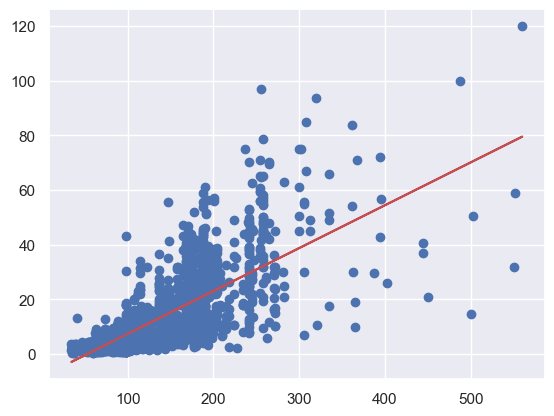

In [30]:
# Visualizing the regression line
plt.scatter(X_train, Y_train)
plt.plot(X_train, -8.2950 + 0.1568*X_train, 'r')
plt.show()

# Predictions on the Test data or Evaluating the model

In [31]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
Y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
Y_test_pred

1791     2.678882
4463    44.254055
200     18.355795
3494    13.025645
5271     7.476017
          ...    
919      5.814265
2736     5.610465
1857     2.208575
5162    -0.879777
3737    18.120641
Length: 1788, dtype: float64

In [32]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(Y_test, Y_test_pred)
r_squared

0.5724629977821635

The R² value by using the above code = 0.572

If we can remember from the training data, the R² value = 0.602

Since the R² value on test data is within 5% of the R² value on training data, we can conclude that the model is pretty stable. Which means, what the model has learned on the training set can generalize on the unseen test set.

Let’s visualize the line on the test data.

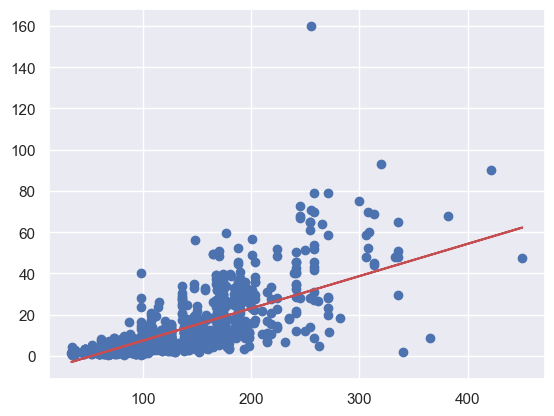

In [33]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test_pred, 'r')
plt.show()